# Smallest Bounding Box
### Mehdi Lotfipour

There are $n$ 2D points in a plane and we want to draw the smallest bounding region to cover all points. This region is a rectangle and is parallel to the axis. For this purpose we find the minimum and maximum for both x-coordinate and y-coordinate of points. Finding minimum or maximum in a 1D array at least takes a time of $O(n)$  and $n - 1$ comparison. Finding both min and max in a naive way takes a time of $O(2.n) = O(n)$  and $2n - 2$ comparison. But there is a better divide and conquer algorithm which is $O(n)$  with less comparison $\frac{3n}{2}$. In this algorithm we divide the array to $\frac{n}{2}$ pairs and compare each pair. This step takes $\frac{n}{2}$ comparison. Then we keep the smaller number in minimum list and bigger one in maximum list. Now we have two list containing $\frac{n}{2}$ number each. With $\frac{n}{2} - 1$ comparison we can find min or max in each list. Total minimum must be in minimum list and total maximum is in maximum list.

Total comparison: $\frac{n}{2} + (\frac{n}{2} - 1) + (\frac{n}{2} - 1) = \frac{3n}{2} - 2$ which is $O(n)$

First we import main libraries for generating random data points and plotting final result.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

We generate 10000 random points and select 100 to looks completely random.

In [2]:
#generating random dataset for testing
#making 10000 points and sampling 100 points
dataset = np.random.normal(0, 1, size= [10000,2])
index = np.random.choice(dataset.shape[0], size=100, replace= False)
dataset = dataset[index]

Then we define our min-max function which takes a 1D array and return its minimum and maximum.

In [3]:
#min_max function
#take a list and return its min and max
def min_max(given_list):
    min_list = []
    max_list = []
    #if length of array is even
    if len(given_list) % 2 == 0:
        for i in range(0, len(given_list), 2):
            if given_list[i] <= given_list[i + 1]:
                min_list.append(given_list[i])
                max_list.append(given_list[i + 1])
            else:
                max_list.append(given_list[i])
                min_list.append(given_list[i + 1])
    #if length of array is odd
    else:
        for i in range(0, len(given_list) - 1, 2):
            if given_list[i] <= given_list[i + 1]:
                min_list.append(given_list[i])
                max_list.append(given_list[i + 1])
            else:
                max_list.append(given_list[i])
                min_list.append(given_list[i + 1])
            #adding last element in both list
            min_list.append(given_list[-1])
            max_list.append(given_list[-1])
    return (min(min_list), max(max_list))

We apply the function on x-coordinate and y-coordiante of points and keep its result.

In [4]:
#performing min_max function on both features
#from generated dataset
hor_min, hor_max = min_max(dataset[:,0])
ver_min, ver_max = min_max(dataset[:,1])

At the end we plot the points and its bounding box.

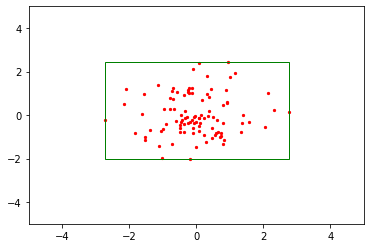

In [5]:
#showing result
#scatter points and boundry lines
fig, ax = plt.subplots()
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.scatter(dataset[:,0], dataset[:,1], s= 5, c= 'r')
ax.add_patch(Rectangle((hor_min, ver_min), hor_max - hor_min, ver_max - ver_min,
                       edgecolor = 'g', fill= False, lw= 1))